In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline

## This first part is from the multivariable regression drill

In [2]:
nyc_crime = pd.read_excel('nyc_crime.xls')

In [3]:
nyc_crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [4]:
nyc_crime.columns = nyc_crime.iloc[3]

In [5]:
nyc_crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [6]:
nyc_crime = nyc_crime.drop(nyc_crime.index[:4])
nyc_crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [7]:
nyc_crime = nyc_crime.reset_index(drop=True)
nyc_crime.index.name = None

In [8]:
nyc_crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [9]:
nyc_crime['Population_Squared'] = nyc_crime['Population']*nyc_crime['Population']

In [10]:
nyc_crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population_Squared
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,3463321
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,6640929
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0,8099716
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,40806544


In [11]:
nyc_crime['Murder'] = np.where(nyc_crime['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)

In [12]:
nyc_crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population_Squared,Murder
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,3463321,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,6640929,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0,8099716,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,40806544,0


In [13]:
nyc_crime['Robbery2'] = np.where(nyc_crime['Robbery'] > 0, 1, 0)

In [14]:
nyc_crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3',
       'Population_Squared', 'Murder', 'Robbery2'],
      dtype='object', name=3)

In [15]:
nyc_crime = nyc_crime[['City','Population','Population_Squared', 'Murder','Robbery2','Property\ncrime']]

In [16]:
nyc_crime.head()

3,City,Population,Population_Squared,Murder,Robbery2,Property crime
0,Adams Village,1861,3463321,0,0,12
1,Addison Town and Village,2577,6640929,0,0,24
2,Akron Village,2846,8099716,0,0,16
3,Albany,97956,9595377936,1,1,4090
4,Albion Village,6388,40806544,0,1,223


## Here is my data frame that is prepared according to the specifications from the drill.

In [17]:
nyc_crime = nyc_crime.rename(columns = {'Property\ncrime':'Property_Crime'})
nyc_crime.head()

3,City,Population,Population_Squared,Murder,Robbery2,Property_Crime
0,Adams Village,1861,3463321,0,0,12
1,Addison Town and Village,2577,6640929,0,0,24
2,Akron Village,2846,8099716,0,0,16
3,Albany,97956,9595377936,1,1,4090
4,Albion Village,6388,40806544,0,1,223


## Challenge: make your own regression model

In [18]:

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = nyc_crime['Property_Crime'].values.reshape(-1, 1)
X = nyc_crime[['Population', 'Murder','Robbery2']]
Y = Y[:-3]
X = X[:-3]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.68728222e-02   6.07383740e+02   1.06994709e+02]]

Intercept: 
 [-32.72226824]

R-squared:
0.993448543573


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


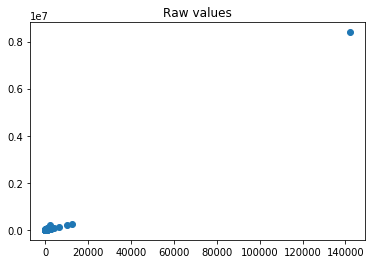

In [19]:
Z = nyc_crime['Population']
Z = Z[:-3]

plt.scatter(Y, Z)
plt.title('Raw values')
plt.show()

In [20]:
nyc_crime[nyc_crime['Population']>120000]

3,City,Population,Population_Squared,Murder,Robbery2,Property_Crime
35,Buffalo,258789,66971746521,1,1,12491
216,New York,8396126,70494931807876,1,1,141971
272,Rochester,210562,44336355844,1,1,10051
310,Syracuse,143834,20688219556,1,1,6473
346,Yonkers,199134,39654349956,1,1,2368


In [21]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y2 = nyc_crime['Property_Crime'].values.reshape(-1, 1)
X2 = nyc_crime[['Population_Squared', 'Murder','Robbery2']]
Y2 = Y2[:-3]
X2 = X2[:-3]

regr.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y2))


Coefficients: 
 [[  1.99256120e-09   1.18406016e+03   3.00052598e+02]]

Intercept: 
 [ 40.08610471]

R-squared:
0.985987120403


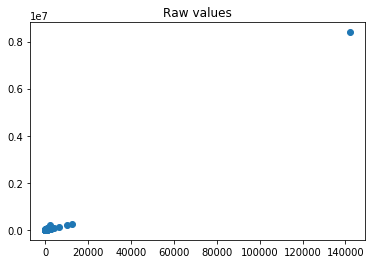

In [22]:
Z2 = nyc_crime['Population']
Z2 = Z2[:-3]

plt.scatter(Y2, Z2)
plt.title('Raw values')
plt.show()

In [36]:
lower_pop = nyc_crime[nyc_crime['Population']<300000]
lower_pop.head()

3,City,Population,Population_Squared,Murder,Robbery2,Property_Crime
0,Adams Village,1861,3463321,0,0,12
1,Addison Town and Village,2577,6640929,0,0,24
2,Akron Village,2846,8099716,0,0,16
3,Albany,97956,9595377936,1,1,4090
4,Albion Village,6388,40806544,0,1,223


In [24]:
regr = linear_model.LinearRegression()
Y3 = lower_pop['Property_Crime'].values.reshape(-1, 1)
X3 = lower_pop[['Population', 'Murder','Robbery2']]
Y3 = Y3[:-3]
X3 = X3[:-3]

regr.fit(X3, Y3)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X3, Y3))


Coefficients: 
 [[  3.86549798e-02  -3.28405461e+01  -1.37239976e+02]]

Intercept: 
 [-127.25960813]

R-squared:
0.847206029477


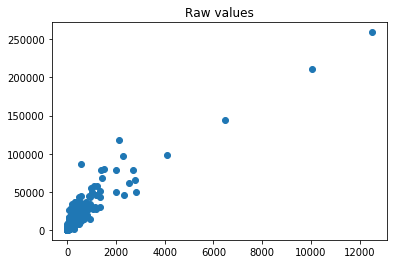

In [25]:
Z3 = lower_pop['Population']
Z3 = Z3[:-3]

plt.scatter(Y3, Z3)
plt.title('Raw values')
plt.show()

In [26]:
regr = linear_model.LinearRegression()
Y4 = lower_pop['Property_Crime'].values.reshape(-1, 1)
X4 = lower_pop[['Population_Squared', 'Murder','Robbery2']]
Y4 = Y4[:-3]
X4 = X4[:-3]

regr.fit(X4, Y4)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X4, Y4))


Coefficients: 
 [[  1.97130728e-07   3.66943124e+02   2.02067642e+02]]

Intercept: 
 [ 37.43211647]

R-squared:
0.909388255108


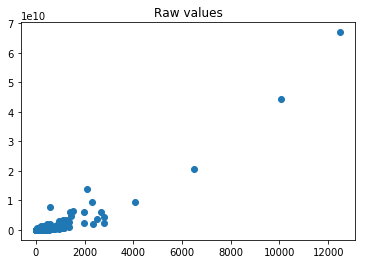

In [27]:
Z4 = lower_pop['Population_Squared']
Z4 = Z4[:-3]

plt.scatter(Y4, Z4)
plt.title('Raw values')
plt.show()

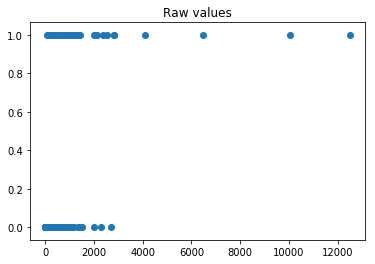

In [28]:
Z4 = lower_pop['Murder']
Z4 = Z4[:-3]

plt.scatter(Y4, Z4)
plt.title('Raw values')
plt.show()

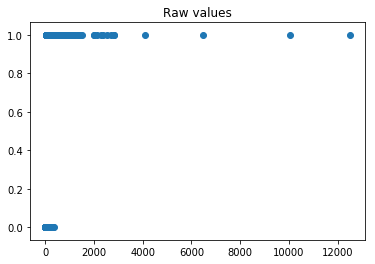

In [29]:
Z4 = lower_pop['Robbery2']
Z4 = Z4[:-3]

plt.scatter(Y4, Z4)
plt.title('Raw values')
plt.show()

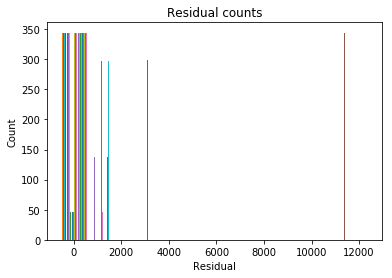

In [32]:
predicted = regr.predict(X3).ravel()
actual = lower_pop['Property_Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

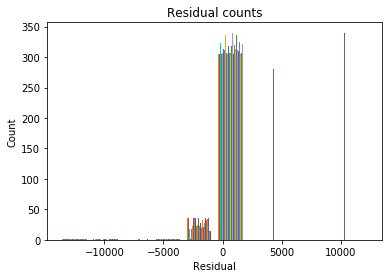

In [34]:
predicted2 = regr.predict(X4).ravel()
actual2 = lower_pop['Property_Crime']

# Calculate the error, also called the residual.
residual2 = actual2 - predicted2

# This looks a bit concerning.
plt.hist(residual2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [38]:
Y5 = nyc_crime['Property_Crime'].values.reshape(-1, 1)
X5 = nyc_crime[['Population','Population_Squared', 'Murder','Robbery2']]
Y5 = Y5[:-3]
X5 = X5[:-3]

regr.fit(X5, Y5)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X5, Y5))


Coefficients: 
 [[  3.46570268e-02  -2.11108019e-09   1.51866535e+01  -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.996124710499


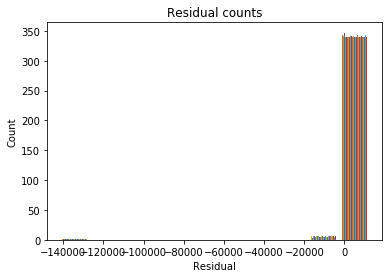

In [39]:
predicted3 = regr.predict(X5).ravel()
actual3 = lower_pop['Property_Crime']

# Calculate the error, also called the residual.
residual3 = actual3 - predicted3

# This looks a bit concerning.
plt.hist(residual3)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()